In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [27]:
k = 5

### Implemented a linear regression learner to solve this best fit problem for 1 dimensional data. Made sure that the implementation can handle fits for different ”function depths” (at least to ”depth” 6).

In [28]:
def readData(string):
    df = pd.read_csv(string, sep=",", index_col=False)
    df.columns = ["X", "y"]
    data = np.array(df, dtype=float)
    return data[:,:1], data[:, -1], df

In [30]:
def load_data(df):
    cols = df.columns.values
    df.columns = cols
    data = np.array(df, dtype=float)
    normalize(data)
    return data[:,: d * 2 + 1], data[:, -1]

In [31]:
def plot_data(x, y):
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

In [32]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))

In [33]:
def h(x,theta):
    return np.matmul(x, theta)

In [34]:
def cost_function(x, y, theta):
    val = h(x, theta)
    return (val - y).T@(val -y)/(2*y.shape[0])

In [35]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
    
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [36]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

In [37]:
def test(d, x, theta, mu, std):
    x1 = (x - mu[0]) / std[0]
    total = 0
    for i in range(1, d + 1 ):
        s = np.sin(k * i * x)
        c = np.cos(k * i * x)

        ms = (s - mu[i])/std[i]
        mc = (c - mu[i])/std[i]

        tsin = theta[2 * i] * ms
        tcos = theta[2 * i + 1] * mc
        total += tsin + tcos
        
    y_pred = theta[0] * 1 + theta[1] * x1 + total

    #print('Prediction ', y_pred)
    
    return y_pred

In [49]:
def error(x, y, d):
    y = np.reshape(y, (x.shape[0],1))
    x = np.hstack((np.ones((x.shape[0],1)), x))
    theta = np.zeros((x.shape[1], 1))

    learning_rate = 0.1
    num_epochs = 50
    theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
    J = cost_function(x, y, theta)
    #print("Cost: ", J)
    #print("Parameters: ", theta)

    #for testing and plotting cost 
    n_epochs = []
    jplot = []
    count = 0
    for i in J_all:
        jplot.append(i[0][0])
        n_epochs.append(count)
        count += 1
    jplot = np.array(jplot)
    n_epochs = np.array(n_epochs)
    plot_cost(jplot, n_epochs)
    print('mean len ', len(theta))
    y_pred = test(d, X_test, theta, mu, std)
    y_pred= y_pred.reshape(-1)
    
    MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)
    
    
    

### Applied the regression learner to the data set that was generated displayed the resulting function for ”function depth” 0, 1, 2, 3, 4, 5, and 6. Displayed the resulting function together with the data points.

In [39]:
x, y, df = readData('1b_training.csv')

In [40]:
d  = 12

for i in range(1, d + 1):
    rsin = np.sin(4 * i * x)
    rcos = np.cos(4 * i * x)
    df['sin('+str(k*i)+'x)'] = rcos
    df['cos('+str(k*i)+'x)'] = rsin

df.head(1)

,X,y,sin(5x),cos(5x),sin(10x),cos(10x),sin(15x),cos(15x),sin(20x),cos(20x),...,sin(40x),cos(40x),sin(45x),cos(45x),sin(50x),cos(50x),sin(55x),cos(55x),sin(60x),cos(60x)
0,-1.7085,-6.191946,0.852098,-0.523382,0.452143,-0.891945,-0.081557,-0.996669,-0.591133,-0.806574,...,-0.301124,0.953585,0.242501,0.970151,0.714394,0.699743,0.974967,0.22235,0.947142,-0.320816


In [41]:
new_cols = [col for col in df.columns if col != 'y'] + ['y']
df = df[new_cols]
df.head(1)

,X,sin(5x),cos(5x),sin(10x),cos(10x),sin(15x),cos(15x),sin(20x),cos(20x),sin(25x),...,cos(40x),sin(45x),cos(45x),sin(50x),cos(50x),sin(55x),cos(55x),sin(60x),cos(60x),y
0,-1.7085,0.852098,-0.523382,0.452143,-0.891945,-0.081557,-0.996669,-0.591133,-0.806574,-0.925849,...,0.953585,0.242501,0.970151,0.714394,0.699743,0.974967,0.22235,0.947142,-0.320816,-6.191946


In [42]:
X_test, y_test, df_test = readData('1c_testing.csv')

### Evaluated the regression functions by computing the error on the test data points. Compared the error results and tried to determine for what depth overfitting might be a problem. Which order depth should be considered the best prediction function and reasoning.

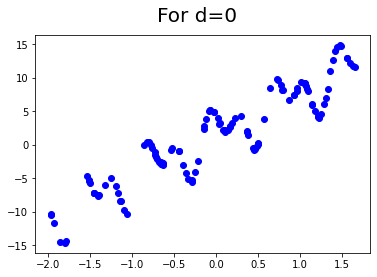

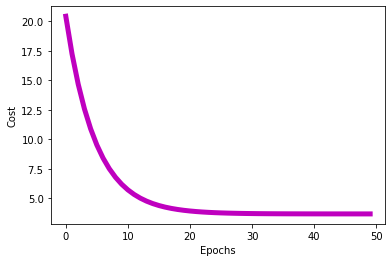

mean len  2
Root Mean Square Error:

3.4766012626153233


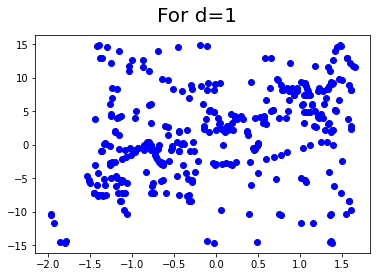

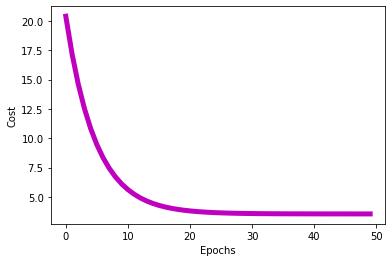

mean len  4
Root Mean Square Error:

3.2989067635258444


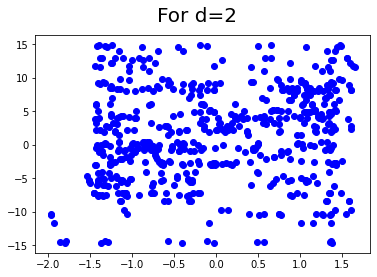

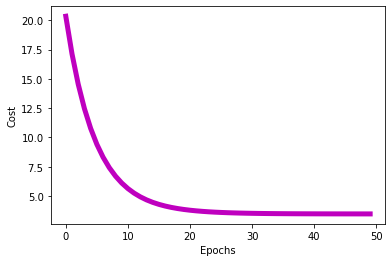

mean len  6
Root Mean Square Error:

3.2803160199304084


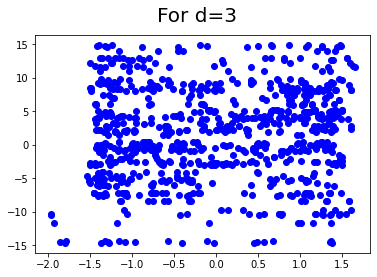

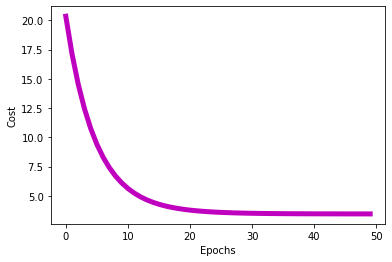

mean len  8
Root Mean Square Error:

3.231581866217561


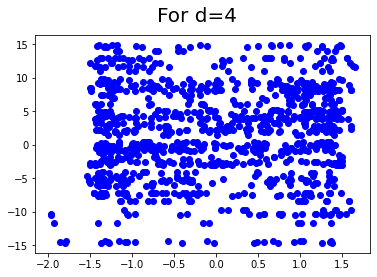

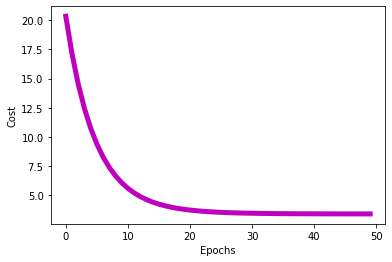

mean len  10
Root Mean Square Error:

3.206189599731392


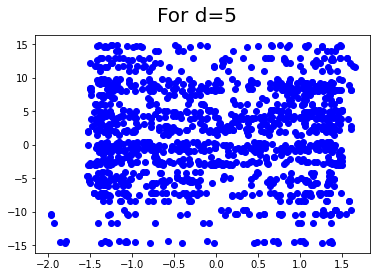

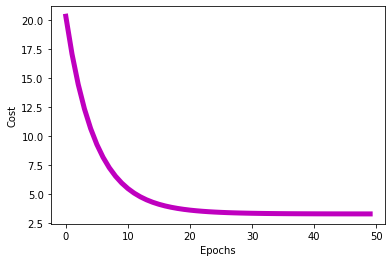

mean len  12
Root Mean Square Error:

3.4582932199473557


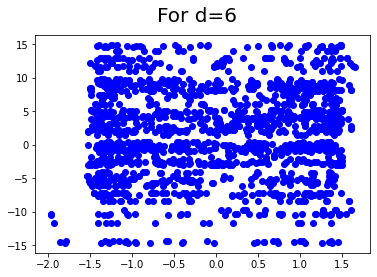

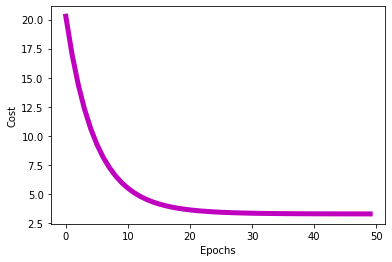

mean len  14
Root Mean Square Error:

3.393074161307716


In [61]:
for i in range(0,7):
    mu = []
    std = []
    d = i
    x_, y_ = load_data(df)
    plt.suptitle(f'For d={i}', fontsize = 20)
    plt.plot(x_,y_,'bo')
    plt.show()
    error(x_, y_, i)

We can infer from the above that RMSE decreases as the value of depth increases. For d=4 it's RMSE value (RMSE=3.206189) is  minimum comparatively and then it starts increasing as the d increases.It turns out to be the variable with highest correlation. Therefore for depth equal to 4 the hypothesis is considered to give the best prediction function. <br>
As the d increases the model turns out to grow more complex. There are a large number of parameters. It becomes difficult for the model to generalise well to new data. It can perform very well on training data but perform very poor on test dataFrom the above graphs it can be seen that the data overfits the hypothesis function as the RMSE values doesn't tend to change.

### Repeated the experiment and evaluation of part using only the first 20 elements of the training data set and the Test set. Explained the differences that might occur.

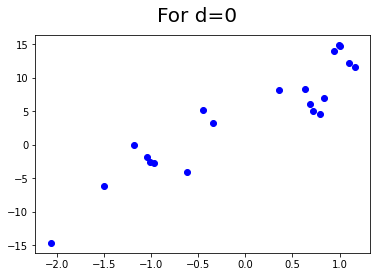

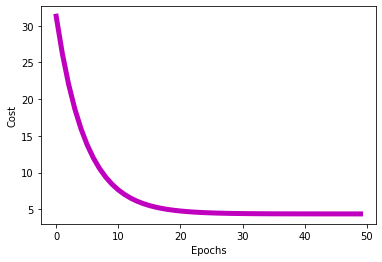

mean len  2
Root Mean Square Error:

3.322942088933961


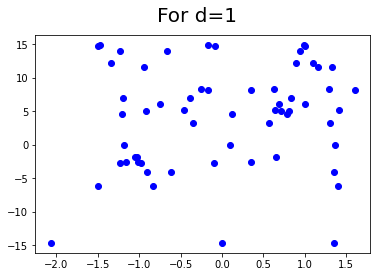

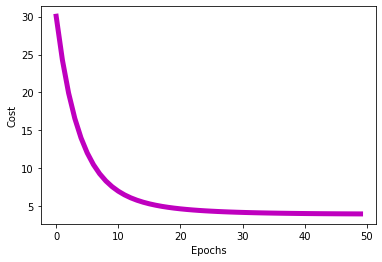

mean len  4
Root Mean Square Error:

3.033339230216781


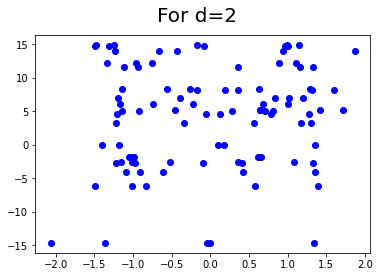

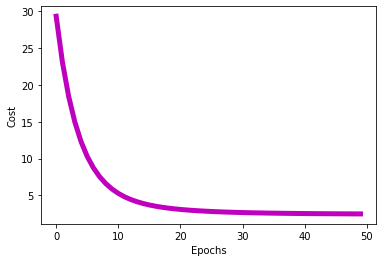

mean len  6
Root Mean Square Error:

3.493515514493658


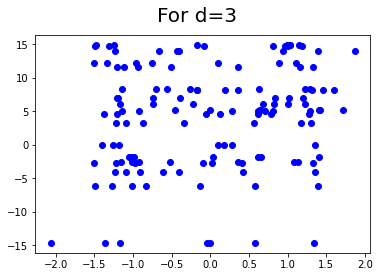

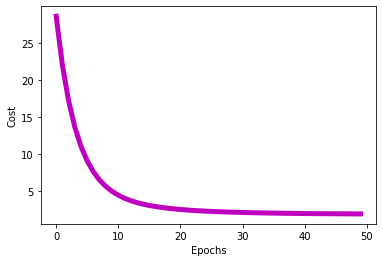

mean len  8
Root Mean Square Error:

3.208762170634579


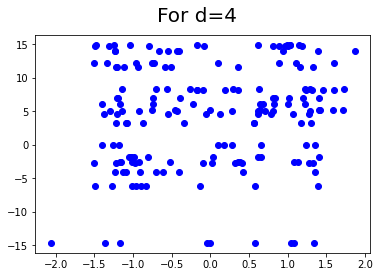

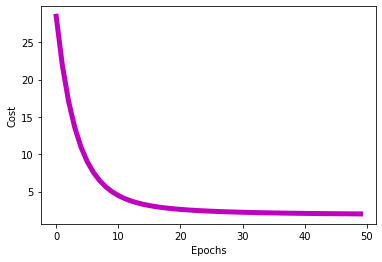

mean len  10
Root Mean Square Error:

3.2772432108121508


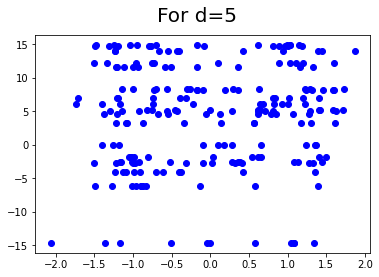

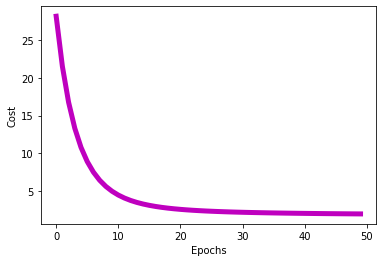

mean len  12
Root Mean Square Error:

3.403449406558696


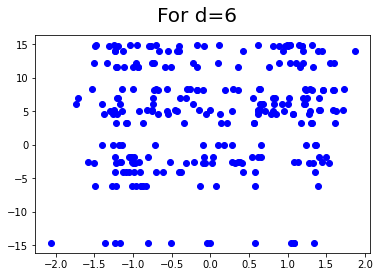

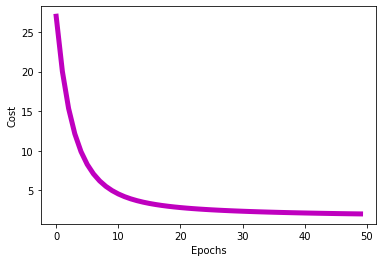

mean len  14
Root Mean Square Error:

3.430011839354945


In [59]:
for i in range(0,7):
    mu = []
    std = []
    d = i
    x_, y_ = load_data(df.iloc[:20,:])
    plt.suptitle(f'For d={i}', fontsize = 20)
    plt.plot(x_,y_,'bo')
    plt.show()
    error(x_, y_, i)

The RMSE value for d = 1 is less comparatively where the hypothesis function gives better predictions whereas in the part c the RMSE value for d=4 is minimum where the hypothesis function gives better predictions. The RMSE values for the particular depths respectively for the data with first 20 rows are less than that of the data in the part c 